In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from app import ExponentialMixtureModel

In [70]:
# Helper functions
def create_sample(lambdas: np.ndarray, true_weights: np.ndarray, size: int = 100, random_state: int = 42):
    '''
    Computa una mixtura de funciones exponenciales con dos componentes.

    Args:
    - lambdas: np.ndarray, tasas de las distribuciones exponenciales.
    - true_weights: np.ndarray, pesos de las distribuciones exponenciales.
    '''

    np.random.seed(random_state)

    X1 = np.random.exponential(scale=lambdas[0], size=size)
    X2 = np.random.exponential(scale=lambdas[1], size=size) + 2

    X = np.zeros(shape=100)
    y_true = np.zeros(shape=100)
    for i in np.arange(len(X1)):
        z = np.random.choice([0, 1], p=true_weights)
        if z == 0:
            X[i] = X1[i]
            y_true[i] = 0
        else:
            X[i] = X2[i]
            y_true[i] = 1
    
    return X, y_true

Generamos una distribución mixta que proviene de cuatro distribuciones exponenciales:

In [71]:
X1 = np.random.exponential(scale=1/10, size=100)
X2 = np.random.exponential(scale=1/3, size=100) + 1

X = np.zeros(shape=100)
y_true = np.zeros(shape=100)
for i in np.arange(len(X1)):
    z = np.random.choice([0, 1], p=[0.3, 0.7])
    if z == 0:
        X[i] = X1[i]
        y_true[i] = 0
    else:
        X[i] = X2[i]
        y_true[i] = 1

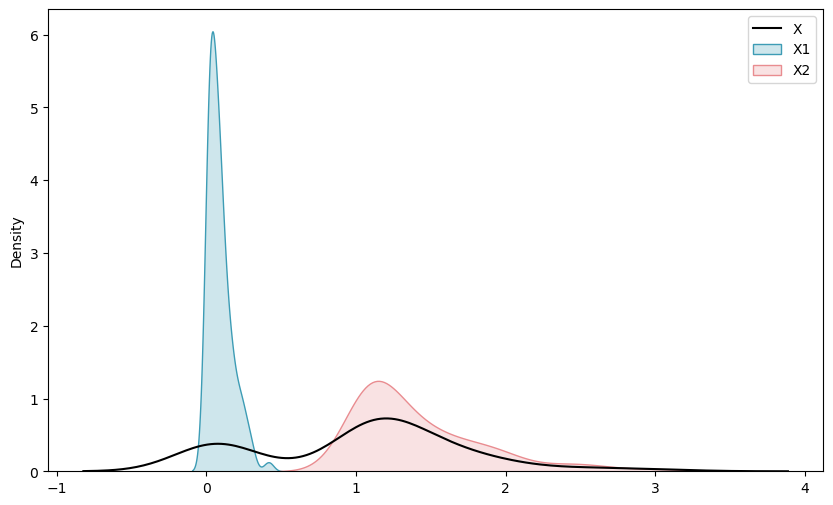

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(X, color='black', ax=ax, label='X')
sns.kdeplot(X1, color='#3D9CB5', fill=True, ax=ax, label='X1')
sns.kdeplot(X2, color='#E98C90', fill=True, ax=ax, label='X2')
ax.legend()

In [73]:
emm = ExponentialMixtureModel(k=2, max_iter=100)
emm.fit(X.reshape(-1, 1))
y_pred_emm = emm.predict(X.reshape(-1, 1))

gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X.reshape(-1, 1))
y_pred_gmm = gmm.predict(X.reshape(-1, 1))

Convergencia alcanzada en la iteración 100


In [74]:
print(accuracy_score(y_true, y_pred_emm))
print(accuracy_score(y_true, y_pred_gmm))

0.88
0.02


In [75]:
accuracy_emm = []
accuracy_gmm = []

lambdas = np.array([1/10, 1/2])
true_weights = np.array([0.3, 0.7])

for i in np.arange(100):
    # Generamos una muestra con dos distribuciones exponenciales
    X, y_true = create_sample(lambdas, true_weights)

    # Ajustamos un modelo de mixtura de exponenciales
    emm = ExponentialMixtureModel(k=2, max_iter=100)
    emm.fit(X.reshape(-1, 1), verbose=False)
    y_pred_emm = emm.predict(X.reshape(-1, 1))

    # Ajustamos un modelo de mixtura de Gaussianas
    gmm = GaussianMixture(n_components=2, max_iter=100)
    gmm.fit(X.reshape(-1, 1))
    y_pred_gmm = gmm.predict(X.reshape(-1, 1))

    # Calculamos el accuracy de ambos modelos
    emm_acc = accuracy_score(y_true, y_pred_emm)
    accuracy_emm.append(emm_acc)
    gmm_acc = accuracy_score(y_true, y_pred_gmm)
    accuracy_gmm.append(gmm_acc)

accuracy_emm_mean = np.mean(accuracy_emm)
accuracy_gmm_mean = np.mean(accuracy_gmm)

print('Mean Accuracy EMM:', accuracy_emm_mean)
print('Mean Accuracy GMM:', accuracy_gmm_mean)

Mean Accuracy EMM: 0.8900000000000001
Mean Accuracy GMM: 1.0
